In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

In [5]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

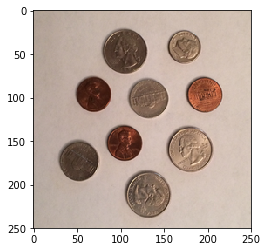

In [13]:
image = cv2.imread("../images/coins.png")
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## 9.1: Simple Thresholding

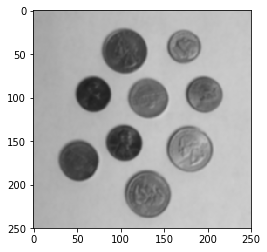

In [9]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_ = plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR))

In [10]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR))

In [11]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
_ = plt.imshow(cv2.cvtColor(threshInv, cv2.COLOR_GRAY2BGR))

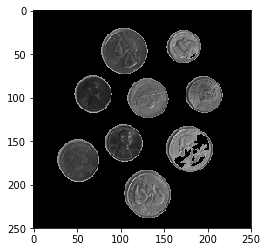

In [12]:
_ = plt.imshow(cv2.cvtColor(cv2.bitwise_and(image, image, mask=threshInv), cv2.COLOR_GRAY2BGR))

## 9.2: Adaptive Thresholding

In [15]:
# Mean thresh
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

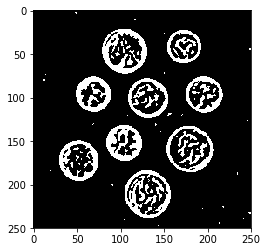

In [17]:
# Gaussian thresh
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

## 9.3: Otsu and Riddler-Calvard

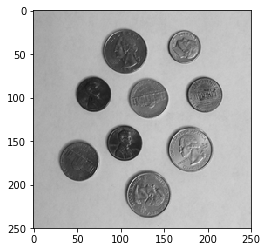

In [42]:
image = cv2.imread("../images/coins.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_ = plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))

In [50]:
# Otsu
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < T] = 0
thresh = cv2.bitwise_not(thresh)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

Otsu's threshold: 137


In [51]:
# Riddler-Calvard
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < T] = 0
thresh = cv2.bitwise_not(thresh)
print(thresh.shape)
_ = plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))

Riddler-Calvard: 137.8011459935957
(250, 250)
